<a href="https://colab.research.google.com/github/ms624atyale/Berenstain_FamilySocial/blob/main/3_MATTRbyCategory_ccw_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐹🐾 <font color = 'green'>>**Converting compiled .txt to csv:** <font color = 'pink'>_This stage can be skipped if you have already done it_.

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd
import lexical_diversity as ld
import glob

#Cloning your repository and set up your current working directory 🍎🍎🍎🍎🍎
!git clone https://github.com/ms624atyale/Berenstain_FamilySocial
%cd /content/Berenstain_FamilySocial/Data_Frame

# Load all .txt files of your current working directory
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

# Go back to main directory
%cd /content/Berenstain_FamilySocial/Data_Frame

# Save as CSV 🍎🍎🍎🍎🍎
df.to_csv("./berenstain_8family_8social_ccw_wc.csv", index=False)

# Display the DataFrame
print(df)
df



fatal: destination path 'Berenstain_FamilySocial' already exists and is not an empty directory.
/content/Berenstain_FamilySocial/Data_Frame
/content/Berenstain_FamilySocial/Data_Frame
                                                 Text  publish year  \
0   what’s this said papa bear as he took the day’...          1981   
1   it was the last day of school and the beginnin...          1982   
2   the bear family who lived in the big tree hous...          1984   
3   brother and sister bear who lived with their m...          1985   
4   on the way to school one day sister bear broth...          1986   
5   once in a while the bear family who lived in t...          1986   
6   sister bear who lived with her mama papa and b...          1987   
7   though brother and sister bear were usually ve...          1987   
8   down a sunny dirt road over a log bridge up a ...          1974   
9   the bear family didn’t always live in the big ...          1981   
10  brother bear said sister impati

,Text,publish year,title,category
0,what’s this said papa bear as he took the day’...,1981,sitter,social
1,it was the last day of school and the beginnin...,1982,go to camp,social
2,the bear family who lived in the big tree hous...,1984,mama’s new job,social
3,brother and sister bear who lived with their m...,1985,learn about strangers,social
4,on the way to school one day sister bear broth...,1986,get stage fright,social
5,once in a while the bear family who lived in t...,1986,the week at grandma’s,social
6,sister bear who lived with her mama papa and b...,1987,the bad habit,social
7,though brother and sister bear were usually ve...,1987,the trouble at school,social
8,down a sunny dirt road over a log bridge up a ...,1974,new baby,family
9,the bear family didn’t always live in the big ...,1981,moving day,family


In [ ]:
# Load the CSV (skip if already loaded) 🍎🍎🍎🍎🍎
df = pd.read_csv("./berenstain_8family_8social_ccw_wc.csv", sep=",")

# <font color = 'blue'> **Getting TTR and MATTR** (based on N_tokens and N_lemmas) including ['Data Size] using len( )

In [ ]:
!pip install textstat
import textstat

# Added column: String length for estimating data size
length = []

for i in range(0, len(df['Text'])):
  LEN = len(df['Text'][i])
  length.append(LEN)

df['Data size'] = length


# Added columns:  Number of Splitted words & Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df['Text'])):
  TSP = df['Text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)

df['Splits'] = tsplit
df['N_Splits'] = splen

# Added column: Lemma 표제어
#df['Lemma'] is a column from a pandas DataFrame, so len(df['Lemma']) gives you the number of rows (or entries) in that column.
lemma = []

for i in range(0, len(df['Text'])):
  LEM = ld.flemmatize(df['Text'][i])
  print(LEM)
  lemma.append(LEM)

df['Lemma'] = lemma


# ADD Lexical Diversity indices

#1. Create two empty lists--one for Type to Token Ratio and the other Moving Average Type to Token Ratio.
TTR = []
MATTR = []

#2. Getting LD index values for each cell:

for i in range(0, len(df['Lemma'])):
  flt = df['Lemma'][i]
  ttr = ld.ttr(flt)
  mattr = ld.mattr(flt)

  #2-1. Add values to each list
  TTR.append(ttr)
  MATTR.append(mattr)


#3. Add columns for TTR and MATTR
df['TTR'] = TTR
df['MATTR'] = MATTR

print(df)
df_selected = df[['category','N_Splits','MATTR']]
df_selected



['what’s', 'this', 'say', 'papa', 'bear', 'as', 'he', 'take', 'the', 'day’s', 'mail', 'from', 'the', 'bear', 'family’s', 'mailbox', 'it', 'be', 'a', 'notice', 'telling', 'about', 'a', 'important', 'meeting', 'that', 'night', 'at', 'the', 'bear', 'country', 'town', 'hall', 'mama', 'bear', 'call', 'up', 'grizzly', 'gran', 'brother', 'and', 'sister', 'bear', 'sometimes', 'stay', 'with', 'gramps', 'and', 'gran', 'when', 'mama', 'and', 'papa', 'bear', 'have', 'to', 'be', 'away', 'but', 'gramps', 'and', 'gran', 'be', 'plan', 'to', 'go', 'to', 'the', 'meeting', 'too', 'so', 'brother', 'and', 'sister', 'couldn’t', 'stay', 'with', 'them', 'or', 'with', 'aunt', 'maude', 'or', 'cousin', 'wilbur', 'they', 'be', 'go', 'to', 'the', 'meeting', 'too', 'why', 'can’t', 'we', 'go', 'with', 'you', 'ask', 'sister', 'beginning', 'to', 'get', 'a', 'little', 'upset', 'yeah', 'add', 'brother', 'bear', 'because', 'say', 'papa', 'this', 'meeting', 'be', 'for', 'grownups', 'and', 'besides', 'it', 'won’t', 'be', '

,category,N_Splits,MATTR
0,social,804,0.787841
1,social,1035,0.784462
2,social,1153,0.777065
3,social,1485,0.772841
4,social,1415,0.755461
5,social,1255,0.800498
6,social,1300,0.786986
7,social,1533,0.792251
8,family,623,0.780557
9,family,896,0.744841


# <font color = 'green'> **MATTR for each creator** (average across different volumes for each creator)

In [ ]:
# Clean up creator names
df['category'] = df['category'].str.strip().str.lower()

df_category_ld = df.groupby("category")['MATTR'].mean().reset_index()
df_category_ld = df_category_ld.round(3)

# --- STEP 6: Save and display results ---
df_category_ld.to_csv('LexicalDiversity_by_category.csv', index=False)
print("✅ Lexical diversity by creator saved as 'LexicalDiversity_by_category.csv'!\n")
df_category_ld

✅ Lexical diversity by creator saved as 'LexicalDiversity_by_category.csv'!



,category,MATTR
0,family,0.769
1,social,0.782


#<font color = 'red'> **Common Core Words for Family & Social saved in a single .csv file**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset 🍎🍎🍎🍎🍎
file_path = "/content/Berenstain_FamilySocial/Data_Frame/berenstain_8family_8social_ccw_wc.csv"  # Change to your actual file name/content/pg_5authors_16books.csv
df_ccw = pd.read_csv(file_path)
# Ensure the text column exists
if 'Text' not in df_ccw.columns or 'category' not in df_ccw.columns:
    raise ValueError("CSV file must contain 'Text' and 'category' columns.")

# Combine all text data into one large string
all_text = " ".join(df_ccw['Text'].astype(str))

# Tokenize words
words = word_tokenize(all_text.lower())  # Convert to lowercase

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]  # Keep only words, no numbers/symbols

# Count word frequencies
word_counts = Counter(words)

# Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])  # Top 100 words

# Save to CSV 🍎🍎🍎🍎🍎
common_words_df.to_csv("berenstain_familySocial_CommonCoreWords.csv", index=False)

print("Common core words extracted and saved as 'berenstain_familySocial_CommonCoreWords.csv'!")

Common core words extracted and saved as 'berenstain_familySocial_CommonCoreWords.csv'!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#<font color = 'red'> **Common Core Words for Family saved in a single .csv file**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset 🍎🍎🍎🍎🍎
file_path = "/content/Berenstain_FamilySocial/Data_Frame/berenstain_8family_ccw_wc.csv"  # Change to your actual file name/content/pg_5authors_16books.csv
df_ccw = pd.read_csv(file_path)
# Ensure the text column exists
if 'Text' not in df_ccw.columns or 'category' not in df_ccw.columns:
    raise ValueError("CSV file must contain 'Text' and 'category' columns.")

# Combine all text data into one large string
all_text = " ".join(df_ccw['Text'].astype(str))

# Tokenize words
words = word_tokenize(all_text.lower())  # Convert to lowercase

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]  # Keep only words, no numbers/symbols

# Count word frequencies
word_counts = Counter(words)

# Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])  # Top 100 words

# Save to CSV 🍎🍎🍎🍎🍎
common_words_df.to_csv("berenstain_family_CommonCoreWords.csv", index=False)

print("Common core words extracted and saved as 'berenstain_family_CommonCoreWords.csv'!")

Common core words extracted and saved as 'berenstain_family_CommonCoreWords.csv'!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#<font color = 'red'> **Common Core Words for Social saved in a single .csv file**

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset 🍎🍎🍎🍎🍎
file_path = "/content/Berenstain_FamilySocial/Data_Frame/berenstain_8socia_ccw_wcl.csv"  # Change to your actual file name/content/pg_5authors_16books.csv
df_ccw = pd.read_csv(file_path)
# Ensure the text column exists
if 'Text' not in df_ccw.columns or 'category' not in df_ccw.columns:
    raise ValueError("CSV file must contain 'Text' and 'category' columns.")

# Combine all text data into one large string
all_text = " ".join(df_ccw['Text'].astype(str))

# Tokenize words
words = word_tokenize(all_text.lower())  # Convert to lowercase

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word.isalpha() and word not in stop_words]  # Keep only words, no numbers/symbols

# Count word frequencies
word_counts = Counter(words)

# Convert to a DataFrame
common_words_df = pd.DataFrame(word_counts.most_common(100), columns=['Word', 'Frequency'])  # Top 100 words

# Save to CSV 🍎🍎🍎🍎🍎
common_words_df.to_csv("berenstain_Social_CommonCoreWords.csv", index=False)

print("Common core words extracted and saved as 'berenstain_Social_CommonCoreWords.csv'!")

Common core words extracted and saved as 'berenstain_Social_CommonCoreWords.csv'!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# <font color = 'sky blue'> **Creating a word cloud** based on Common Core Words(CCW) under Family & Social Category

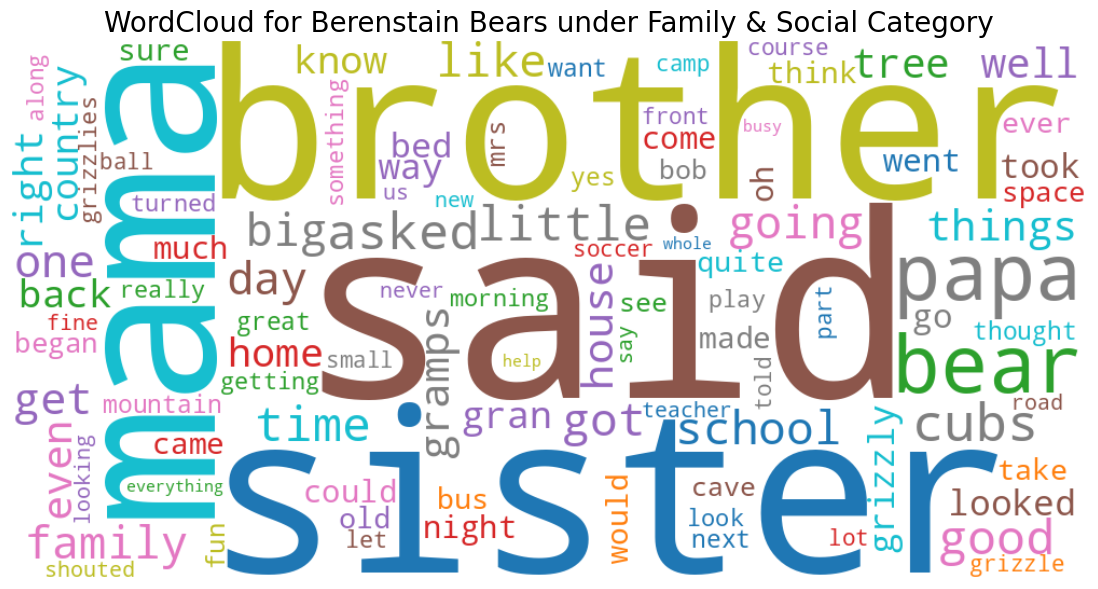

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to the combined CSV file (not a folder)🍎🍎🍎🍎🍎
input_file = "/content/Berenstain_FamilySocial/Data_Frame/berenstain_familySocial_CommonCoreWords.csv"

# Read the CSV containing word-frequency pairs
df = pd.read_csv(input_file)

# Convert to dictionary: {'word1': freq1, 'word2': freq2, ...}
word_freq = dict(zip(df['Word'], df['Frequency']))

# Create and generate the word cloud
wc = WordCloud(width=1000, height=500, background_color='white', colormap='tab10')
wc.generate_from_frequencies(word_freq)

# Display the word cloud inline in Colab
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Berenstain Bears under Family & Social Category", fontsize=20)
plt.show()

# <font color = 'sky blue'> **Creating a word cloud** based on Common Core Words(CCW) under Family Category

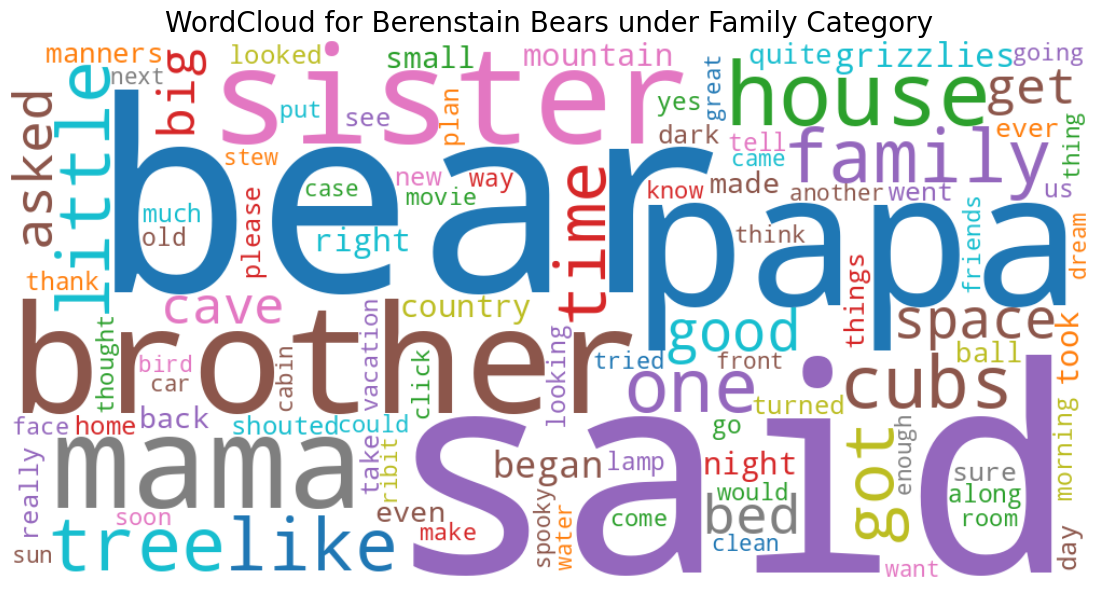

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to the combined CSV file (not a folder)🍎🍎🍎🍎🍎
input_file = "/content/Berenstain_FamilySocial/Data_Frame/berenstain_family_CommonCoreWords.csv"

# Read the CSV containing word-frequency pairs
df = pd.read_csv(input_file)

# Convert to dictionary: {'word1': freq1, 'word2': freq2, ...}
word_freq = dict(zip(df['Word'], df['Frequency']))

# Create and generate the word cloud
wc = WordCloud(width=1000, height=500, background_color='white', colormap='tab10')
wc.generate_from_frequencies(word_freq)

# Display the word cloud inline in Colab
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Berenstain Bears under Family Category", fontsize=20)
plt.show()

# <font color = 'sky blue'> **Creating a word cloud** based on Common Core Words(CCW) under Social Category

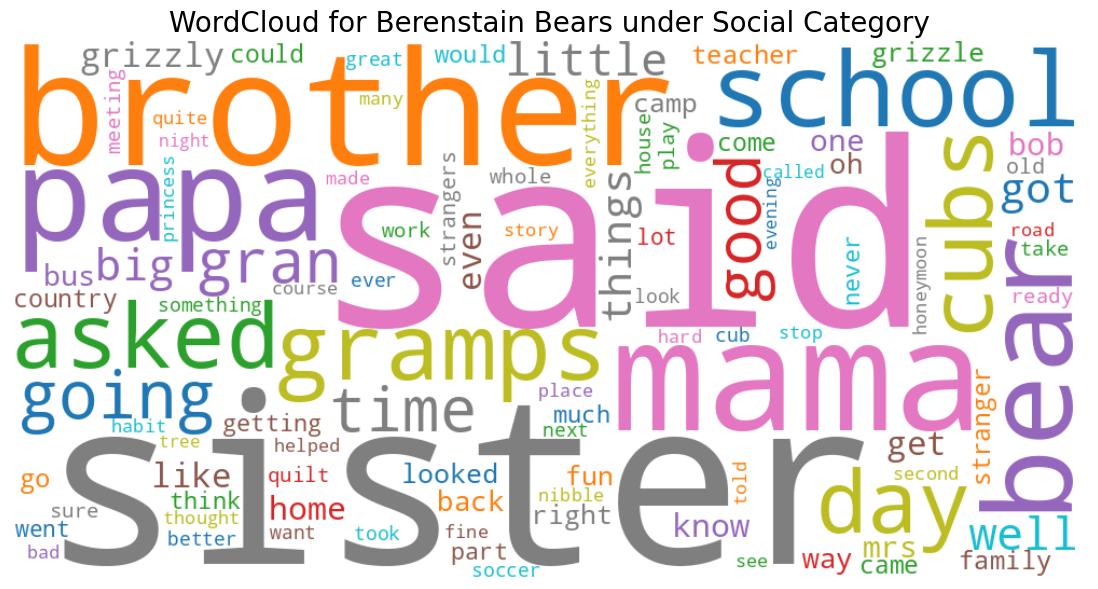

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Path to the combined CSV file (not a folder)🍎🍎🍎🍎🍎
input_file = "/content/Berenstain_FamilySocial/Data_Frame/berenstain_Social_CommonCoreWords.csv"

# Read the CSV containing word-frequency pairs
df = pd.read_csv(input_file)

# Convert to dictionary: {'word1': freq1, 'word2': freq2, ...}
word_freq = dict(zip(df['Word'], df['Frequency']))

# Create and generate the word cloud
wc = WordCloud(width=1000, height=500, background_color='white', colormap='tab10')
wc.generate_from_frequencies(word_freq)

# Display the word cloud inline in Colab
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Berenstain Bears under Social Category", fontsize=20)
plt.show()